###  log 
해야할 작업 . 추가적으로 시계열 분석 

#### 2023-1-20
- 내가 세운 가설 : 
 1) 처음에는 viewtime 이 높으면 basket action_type 이 많을 것(가설) 
 2) viewtime ~ action_type(view)  
 * basket은 click률과 연관이 있다.

 -- EDA 결과 : 근데 basket 은 viewtime 0 임.
  -> viewtime 이 높으면 view 에서 basket 으로 바뀔 확률이 높을 것이다.(가설) 
  -> correlation 

- 1차 목표 : 날짜 안에서 시간대에 따른 Viewtime을 예측. 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pmdarima as pm 
from pmdarima.arima import ndiffs 

In [ ]:
# 차분이 필요한지 , 필요하다면 몇 차의 차분이 최선인지 파악한다. 

In [ ]:
filename = '/content/drive/MyDrive/data/a1_factory /data/log_csv.csv'
data = pd.read_csv(filename, index_col = 0, parse_dates = True)

In [ ]:
data

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...
5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [ ]:
data.isnull()

In [ ]:
data_y = data.dropna()

In [ ]:
data_y

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...
5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [ ]:
# timestamp 

In [ ]:
data_y = data_y[['collect_time','viewtime']]
data_y.head()

,collect_time,viewtime
0,2022-12-29 17:29:02,80033
1,2022-12-29 12:56:38,0
2,2022-12-29 17:11:30,947
3,2022-12-29 17:54:30,0
4,2022-12-29 18:45:05,1238


In [ ]:
data_y['collect_time'] = pd.to_datetime(data_y['collect_time'])
data_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4364999 entries, 0 to 5659540
Data columns (total 2 columns):
 #   Column        Dtype         
---  ------        -----         
 0   collect_time  datetime64[ns]
 1   viewtime      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 99.9 MB


In [ ]:
data_y.set_index('collect_time', drop = True, inplace = True)
data_y.tail()

,viewtime
collect_time,
2022-12-28 20:01:30,13893
2022-12-28 14:30:09,0
2022-12-29 12:45:13,47217
2022-12-28 11:07:30,54030
2022-12-29 08:14:39,0


In [ ]:
data_y = data_y.sort_index(ascending=True)
data_y.head()

,viewtime
collect_time,
2022-12-22 00:00:00,48015
2022-12-22 00:00:01,110654
2022-12-22 00:00:01,0
2022-12-22 00:00:01,222355
2022-12-22 00:00:02,152362


In [ ]:
data_y.loc['2022-12-22 00:00:00']

viewtime    48015
Name: 2022-12-22 00:00:00, dtype: int64

In [ ]:
data_y.at_time('2022-12-30 12:00:00')

,viewtime
collect_time,
2022-12-22 12:00:00,0
2022-12-22 12:00:00,0
2022-12-22 12:00:00,16762
2022-12-22 12:00:00,8606
2022-12-22 12:00:00,0
2022-12-22 12:00:00,0
2022-12-22 12:00:00,108376
2022-12-22 12:00:00,0
2022-12-22 12:00:00,25022


In [ ]:
data_y.loc['2022-12-28 00:00:00' : '2022-12-30 00:00:00']

,viewtime
collect_time,
2022-12-28 00:00:00,49926
2022-12-28 00:00:00,8005
2022-12-28 00:00:00,229981
2022-12-28 00:00:00,43972
2022-12-28 00:00:00,15004
...,...
2022-12-29 23:59:59,3007
2022-12-30 00:00:00,0
2022-12-30 00:00:00,0


In [ ]:
data_y.between_time('00:00:00' , '12:00:00')

,viewtime
collect_time,
2022-12-22 00:00:00,48015
2022-12-22 00:00:01,110654
2022-12-22 00:00:01,0
2022-12-22 00:00:01,222355
2022-12-22 00:00:02,152362
...,...
2022-12-30 11:59:59,36179
2022-12-30 11:59:59,43177
2022-12-30 11:59:59,1260


In [ ]:
data_y.first('7D') # 7Days 을 의미 

,viewtime
collect_time,
2022-12-22 00:00:00,48015
2022-12-22 00:00:01,110654
2022-12-22 00:00:01,0
2022-12-22 00:00:01,222355
2022-12-22 00:00:02,152362
...,...
2022-12-28 23:59:59,9043
2022-12-28 23:59:59,228013
2022-12-28 23:59:59,17028


In [ ]:
data_y.resample('D')['viewtime'].count()

collect_time
2022-12-22    564119
2022-12-23    495419
2022-12-24    315045
2022-12-25    387019
2022-12-26    621238
2022-12-27    600587
2022-12-28    572824
2022-12-29    552004
2022-12-30    256744
Freq: D, Name: viewtime, dtype: int64

In [ ]:
data_y.resample('W')['viewtime'].size()

collect_time
2022-12-25    1761602
2023-01-01    2603397
Freq: W-SUN, Name: viewtime, dtype: int64

In [ ]:
data_y.index.day_name().value_counts() 

Thursday     1116123
Friday        752163
Monday        621238
Tuesday       600587
Wednesday     572824
Sunday        387019
Saturday      315045
Name: collect_time, dtype: int64

In [ ]:
data_y.index.hour.value_counts().sort_index() # .마지막으로 sort_index()는 날짜별로 정렬 

0     182877
1     115606
2      80131
3      51265
4      36476
5      30453
6      33040
7      46014
8      92930
9     218884
10    287784
11    307058
12    229446
13    337123
14    312332
15    323017
16    311245
17    261652
18    164446
19    154252
20    175110
21    201463
22    222375
23    190020
Name: collect_time, dtype: int64

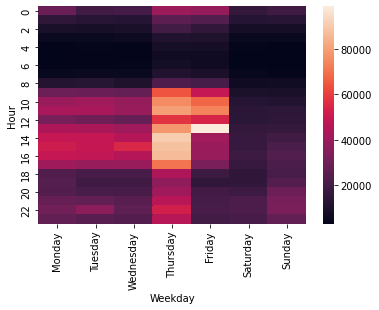

In [ ]:
week = data_y.index.day_name() # Datetimeindex의 요일속성
hour = data_y.index.hour # DatetimeIndex의 시간 속성 
df_week_hour = data_y.groupby([week, hour]).size() # 요일별 시간대별 그룹화 
df_table = df_week_hour.rename_axis(['Weekday', 'Hour']).unstack('Weekday') # 피벗테이블로 변환 
days = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] 
df_table_sort = df_table.reindex(columns= days) #요일별로 정렬 
sns.heatmap(df_table_sort) # seaborn 의 히트맵 차트로 시각화 

- 금요일 12시 
- 목요일 2시 - 4시 


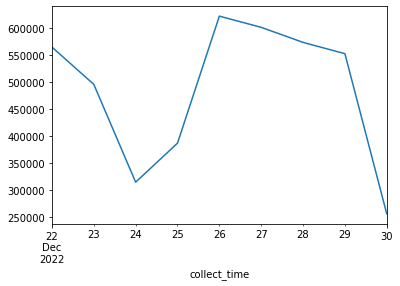

In [ ]:
data_y.resample('D').viewtime.count().plot() #일별로 두고 데이터의 흐름을 파악한 경우 
# viewtime 이 24일과 30일에는 현저히 낮음. 낮아지는 추세..? 

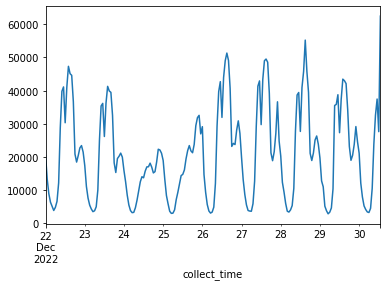

In [ ]:
data_y.resample('H').viewtime.count().plot() #시간대별 
# pattern 이 보인다고 생각
# 시계열의 특성 


In [ ]:
# Rolling 

In [ ]:
- log : 초,분 단위 (초/분 단위는 의미없음.)
- 

In [ ]:
# bidding data ()